**Actividad 3: Proyecto final**


*   Abisai Hernandez Fierros 2132053
*   Carlos Ivan Delgado Gutierrez 1997474

N4-N6


1.- Cargar librerias

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.multioutput import MultiOutputClassifier
import seaborn as sns
import pandas as pd
import numpy as np

In [14]:
#Cargar el dataset
df = pd.read_csv('datos_invernadero.csv')

In [15]:
print(df.head(10))

   Humedad_tierra  iluminacion  temperatura bomba Luces abanico
0        2.185431     0.350860     0.392609     N     N       S
1        4.778214     3.254770     0.225242     S     S       N
2        3.793973     1.708909     0.248489     S     N       N
3        3.193963     2.641139     0.469566     S     S       S
4        1.202084     4.556319     0.381929     N     S       S
5        1.201975     1.396603     0.202759     N     N       N
6        0.761376     2.169838     0.230441     N     S       N
7        4.397793     3.826645     0.399051     S     S       S
8        3.205018     1.298231     0.201518     S     N       N
9        3.686327     0.569504     0.248242     S     N       N


2.- Cargar datos

In [16]:
df[['bomba','Luces','abanico']] = df[['bomba','Luces','abanico']].applymap(lambda x: 1 if x == 'S' else 0)

<ipython-input-16-fab4bc04c24f>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['bomba','Luces','abanico']] = df[['bomba','Luces','abanico']].applymap(lambda x: 1 if x == 'S' else 0)


In [17]:
X = df[['Humedad_tierra','iluminacion','temperatura']].values
Y = df[['bomba','Luces','abanico']].values

In [19]:
print("Primeras 5 entradas (X):\n", X[:5])
print("Primeras 5 salidas (Y):\n", Y[:5])
print(X.shape)
print(Y.shape)

Primeras 5 entradas (X):
 [[2.18543053 0.35086009 0.39260949]
 [4.77821438 3.25476997 0.22524199]
 [3.79397274 1.70890871 0.24848861]
 [3.19396318 2.64113932 0.46956626]
 [1.20208388 4.55631907 0.38192872]]
Primeras 5 salidas (Y):
 [[0 0 1]
 [1 1 0]
 [1 0 0]
 [1 1 1]
 [0 1 1]]
(100, 3)
(100, 3)


3.- Preprocesamiento de datos

In [20]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

4.- Seleccion y entrenamiento de modelo

In [21]:
base_model = DecisionTreeClassifier(random_state=42)

In [22]:
clf = MultiOutputClassifier(base_model)

In [23]:
clf.fit(X_train,Y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=42))

In [25]:
train_accuracy = clf.score(X_train, Y_train)
print(train_accuracy)

1.0


5.- Prueba de modelo

In [26]:
Y_pred = clf.predict(X_test)

In [27]:
outputs = ['bomba','Luces','abanico']

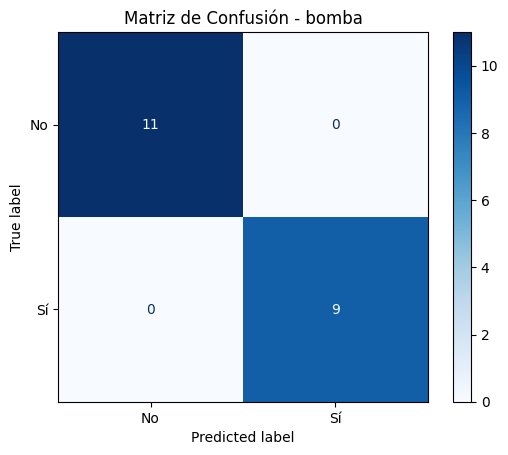

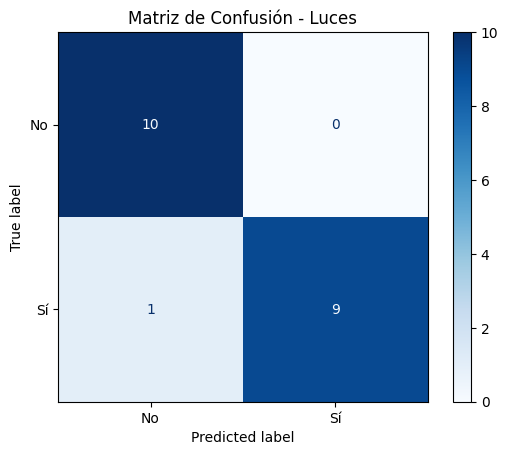

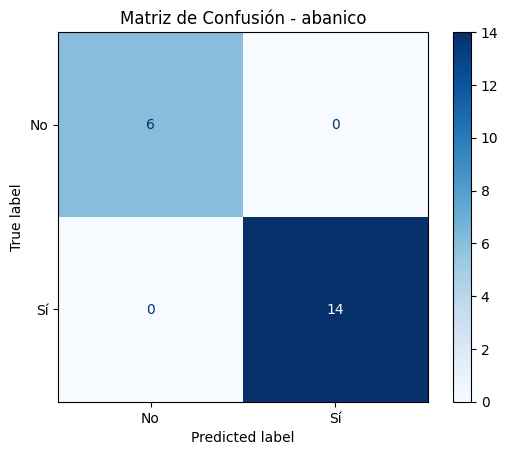

In [28]:
for i, output in enumerate(outputs):
    cm = confusion_matrix(Y_test[:, i], Y_pred[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Sí"])
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusión - {output}")
    plt.show()

In [51]:
print(Y_pred[1])
print(Y_test[1])

[1 1 0]
[1 1 0]


In [52]:
print(Y_pred[5])
print(Y_test[5])

[0 1 0]
[0 1 0]


In [53]:
print(Y_pred[17])
print(Y_test[17])

[0 0 1]
[0 1 1]


In [54]:
for i, output in enumerate(outputs):
    print(f"--- {output.upper()} ---")
    acc = accuracy_score(Y_test[:, i], Y_pred[:, i])
    print("Accuracy:", acc)
    print("Reporte de Clasificación:")
    print(classification_report(Y_test[:, i], Y_pred[:, i], target_names=['No', 'Sí']))
    print()

--- BOMBA ---
Accuracy: 1.0
Reporte de Clasificación:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00        11
          Sí       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


--- LUCES ---
Accuracy: 0.95
Reporte de Clasificación:
              precision    recall  f1-score   support

          No       0.91      1.00      0.95        10
          Sí       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20


--- ABANICO ---
Accuracy: 1.0
Reporte de Clasificación:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         6
          Sí       1.00      1.00      1.00        14

    accuracy   

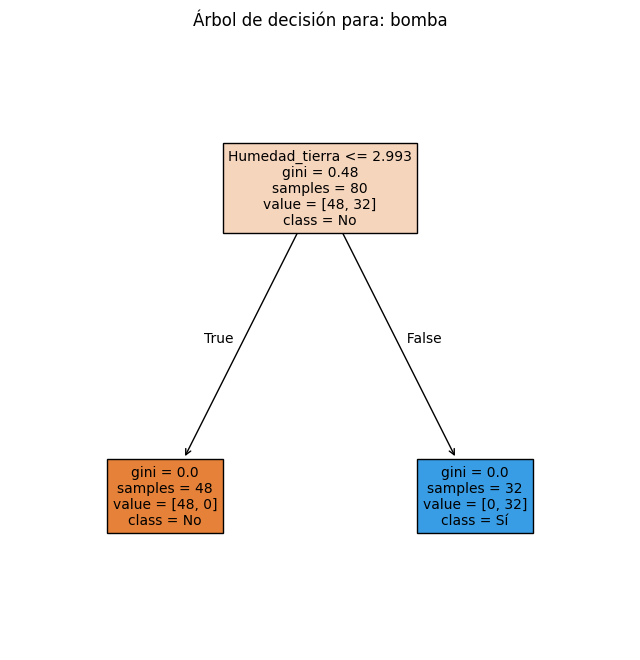

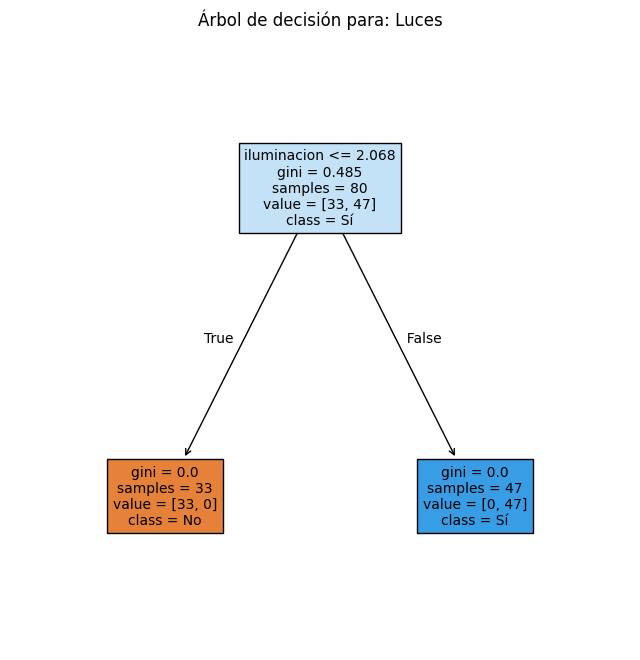

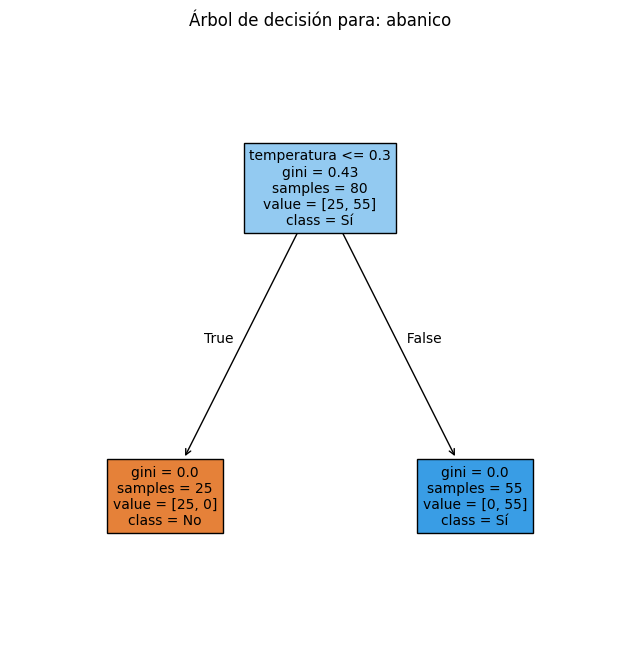

In [62]:
for i, output in enumerate(outputs):
    plt.figure(figsize=(8, 8))
    tree.plot_tree(
        clf.estimators_[i],
        filled=True,
        feature_names=['Humedad_tierra', 'iluminacion', 'temperatura'],
        class_names=['No', 'Sí'],
        fontsize=10
    )
    plt.title(f"Árbol de decisión para: {output}")
    plt.savefig(f'arbol_{output}.png', dpi=300)
    plt.show()